In [2]:
!pip install pandas numpy scikit-learn tensorflow joblib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import joblib


df = pd.read_csv('/content/deepnn.csv')
print("Dataset shape:", df.shape)
# Remove junk columns and clean column names
df = df.dropna(axis=1, how='all')  # removes NaN-only columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # removes Unnamed
df.columns = df.columns.str.strip()  # removes spaces
df.head()


Dataset shape: (4920, 134)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


Shape: (4920, 133)

Columns:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_

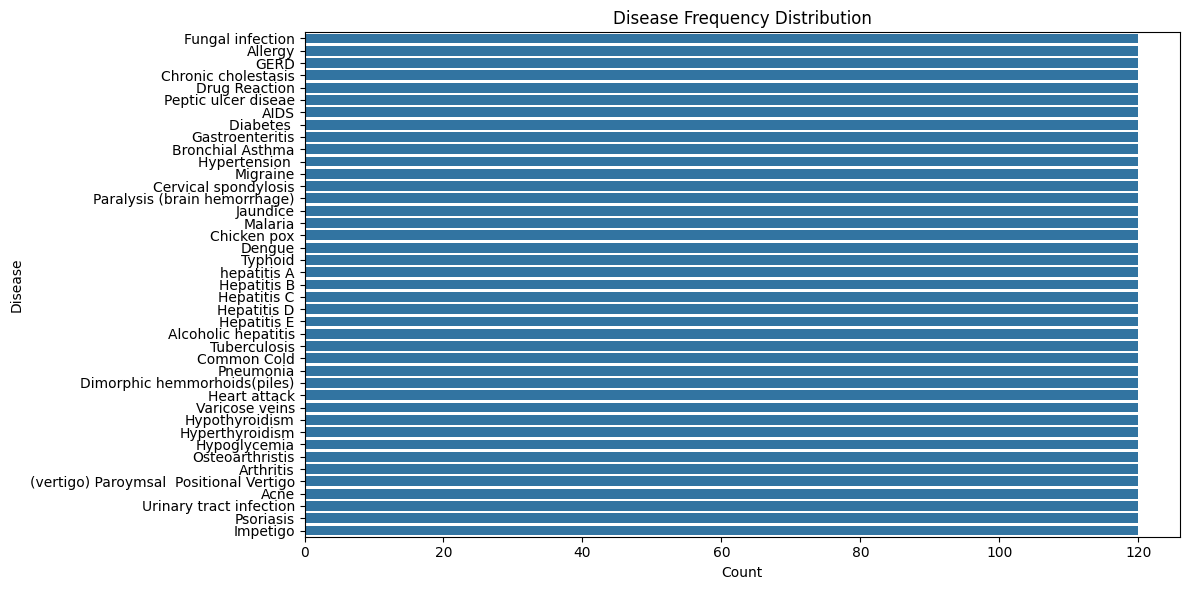


Top 10 most frequent symptoms:
fatigue              1932
vomiting             1914
high_fever           1362
loss_of_appetite     1152
nausea               1146
headache             1134
abdominal_pain       1032
yellowish_skin        912
yellowing_of_eyes     816
chills                798
dtype: int64


In [3]:
# Step 3.5: Exploratory Data Analysis (EDA)

# Shape of dataset
print("Shape:", df.shape)

# List of columns
print("\nColumns:")
print(df.columns.tolist())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check unique diseases
print("\nNumber of unique diseases:", df['prognosis'].nunique())
print(df['prognosis'].value_counts())

# Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y='prognosis', data=df, order=df['prognosis'].value_counts().index)
plt.title('Disease Frequency Distribution')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

# View symptom-wise activation (sum)
symptom_counts = df.drop('prognosis', axis=1).sum().sort_values(ascending=False)
print("\nTop 10 most frequent symptoms:")
print(symptom_counts.head(10))


In [4]:
# Separate features and target
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# Encode target labels to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [5]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 50 informative symptoms
selector = SelectKBest(score_func=mutual_info_classif, k=50)
X_selected = selector.fit_transform(X, y_encoded)

# Get names of top 50 features
selected_features = X.columns[selector.get_support()].tolist()
print(" Selected Features:", selected_features)

# Save selected feature names for UI later
import joblib
joblib.dump(selected_features, 'selected_symptoms.pkl')


 Selected Features: ['itching', 'skin_rash', 'continuous_sneezing', 'chills', 'joint_pain', 'stomach_pain', 'vomiting', 'burning_micturition', 'fatigue', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'cough', 'high_fever', 'breathlessness', 'sweating', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'chest_pain', 'fast_heart_rate', 'neck_pain', 'dizziness', 'obesity', 'excessive_hunger', 'muscle_weakness', 'stiff_neck', 'swelling_joints', 'loss_of_balance', 'depression', 'irritability', 'muscle_pain', 'red_spots_over_body', 'abnormal_menstruation', 'family_history', 'painful_walking']


['selected_symptoms.pkl']

In [6]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import to_categorical
import numpy as np

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(df['prognosis'])
y_onehot = to_categorical(y_encoded)

X_raw = df.drop('prognosis', axis=1)
results = {}

for k in [20, 30, 50]:
    print(f"\n Testing with top {k} features...")

    # Feature selection
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_k = selector.fit_transform(X_raw, y_encoded)
    selected_features = X_raw.columns[selector.get_support()]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_k, y_onehot, test_size=0.2, random_state=42)

    # Build model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(k,)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_onehot.shape[1], activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f" Test Accuracy with {k} features: {acc:.4f}")

    results[k] = acc



 Testing with top 20 features...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Test Accuracy with 20 features: 0.8455

 Testing with top 30 features...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Test Accuracy with 30 features: 0.9065

 Testing with top 50 features...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Test Accuracy with 50 features: 0.9776


In [7]:
# Final training with k=50
k = 50
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_k = selector.fit_transform(X_raw, y_encoded)
selected_features = X_raw.columns[selector.get_support()]

# Save selected features
import joblib
joblib.dump(selected_features.tolist(), 'selected_symptoms.pkl')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_k, y_onehot, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(k,)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_onehot.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f" Final Accuracy: {acc:.4f}")

# Save model & labels
model.save("disease_model.keras")
joblib.dump(le.classes_.tolist(), 'disease_labels.pkl')


Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2593 - loss: 3.3185 - val_accuracy: 0.9137 - val_loss: 1.1788
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8670 - loss: 1.0166 - val_accuracy: 0.9898 - val_loss: 0.2121
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9484 - loss: 0.3372 - val_accuracy: 0.9898 - val_loss: 0.0809
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9649 - loss: 0.1882 - val_accuracy: 0.9924 - val_loss: 0.0520
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.1392 - val_accuracy: 0.9924 - val_loss: 0.0402
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.1140 - val_accuracy: 0.9924 - val_loss: 0.0341
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9769 - loss: 0.1114 - val_accuracy: 0.9924 - val_loss: 0.0310
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9822 - loss: 0.0872 - val_accuracy: 0.

['disease_labels.pkl']

In [8]:
from keras.models import load_model
import joblib
import numpy as np
# Load model
model = load_model("disease_model.keras")

# Load selected symptoms and labels
selected_symptoms = joblib.load("selected_symptoms.pkl")
labels = joblib.load("disease_labels.pkl")

# SAMPLE USER INPUT: change this to test different symptoms
user_symptoms = ['headache', 'vomiting', 'fatigue']

# Create input vector for top 50 symptoms
input_vector = [1 if symptom in user_symptoms else 0 for symptom in selected_symptoms]
input_vector = np.array([input_vector])  # shape (1, 50)

# Predict
prediction = model.predict(input_vector)[0]
predicted_disease = labels[np.argmax(prediction)]

# Show result
print(" Symptoms Given:", user_symptoms)
print(" Predicted Disease:", predicted_disease)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
 Symptoms Given: ['headache', 'vomiting', 'fatigue']
 Predicted Disease: Paralysis (brain hemorrhage)
